In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [3]:
df=pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


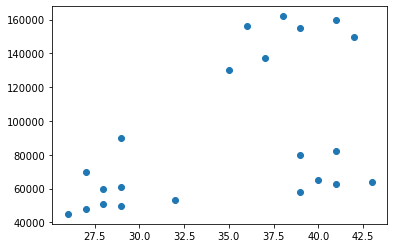

In [4]:
plt.scatter(df['Age'],df['Income($)'])

In [5]:
#object with k(cluster count)
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [6]:
#assign different label(0,1,2) for all 3 cluster
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [7]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


Text(0.5, 0, 'Age')

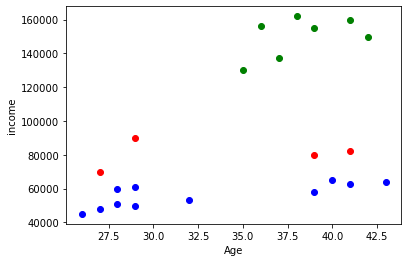

In [8]:
cluster1=df[df.cluster==0]
cluster2=df[df.cluster==1]
cluster3=df[df.cluster==2]

plt.scatter(cluster1.Age,cluster1['Income($)'],color='red')
plt.scatter(cluster2.Age,cluster2['Income($)'],color='green')
plt.scatter(cluster3.Age,cluster3['Income($)'],color='blue')
plt.ylabel("income")
plt.xlabel("Age")
#the below plot shows 2 cluster is colid so we use minmax scaler

In [9]:
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df.Age=scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [10]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [11]:
df['cluster']=y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [12]:
#centroids
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

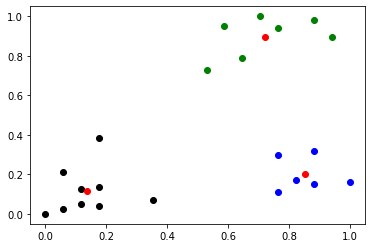

In [13]:
cluster1=df[df.cluster==0]
cluster2=df[df.cluster==1]
cluster3=df[df.cluster==2]

plt.scatter(cluster1.Age,cluster1['Income($)'],color='black')
plt.scatter(cluster2.Age,cluster2['Income($)'],color='green')
plt.scatter(cluster3.Age,cluster3['Income($)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='red')
#Now plot is clustered perfectly

In [14]:
#elbowplot to find optimal k(number of cluster)
k_rng=range(1,10)
sse=[]   #sun of square error
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [15]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2621792762345213,
 0.2347239600356005,
 0.17299621932455464,
 0.13781880133764024,
 0.10907864282306068]

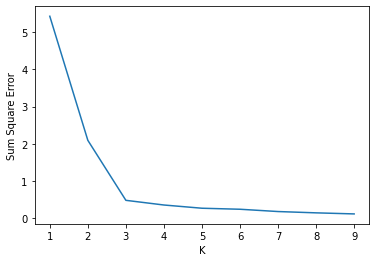

In [16]:
plt.xlabel("K")
plt.ylabel("Sum Square Error")
plt.plot(k_rng,sse)
#in plot elbow is 3(k)